
Assignment 7 - 10/09/2019
Name: Carolina Carvalho Manhaes Leite
NetID: leite2

------------

RANDOM FOREST WITH GRID SEARCH FOR N_ESTIMATORS
 
Accuracies in the training sample:

0.970 (+/-0.001) for {'n_estimators': 5}. Fit time: 0.627 s. Score time: 0.010 s
0.979 (+/-0.001) for {'n_estimators': 10}. Fit time: 1.117 s. Score time: 0.016 s
0.992 (+/-0.001) for {'n_estimators': 15}. Fit time: 1.653 s. Score time: 0.020 s
0.993 (+/-0.001) for {'n_estimators': 20}. Fit time: 2.296 s. Score time: 0.030 s
0.996 (+/-0.000) for {'n_estimators': 25}. Fit time: 3.014 s. Score time: 0.035 s
0.999 (+/-0.000) for {'n_estimators': 50}. Fit time: 5.444 s. Score time: 0.061 s

Accuracies in the test sample:

0.787 (+/-0.014) for {'n_estimators': 5}. Fit time: 0.627 s. Score time: 0.010 s
0.805 (+/-0.013) for {'n_estimators': 10}. Fit time: 1.117 s. Score time: 0.016 s
0.808 (+/-0.011) for {'n_estimators': 15}. Fit time: 1.653 s. Score time: 0.020 s
0.812 (+/-0.012) for {'n_estimators': 20}. Fit time

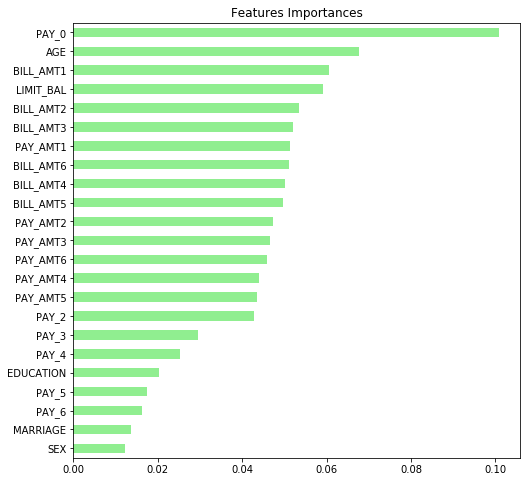


Features Importances:

SEX          0.012121
MARRIAGE     0.013548
PAY_6        0.016220
PAY_5        0.017359
EDUCATION    0.020304
PAY_4        0.025194
PAY_3        0.029492
PAY_2        0.042763
PAY_AMT5     0.043409
PAY_AMT4     0.044027
PAY_AMT6     0.045843
PAY_AMT3     0.046545
PAY_AMT2     0.047285
BILL_AMT5    0.049654
BILL_AMT4    0.050156
BILL_AMT6    0.051196
PAY_AMT1     0.051323
BILL_AMT3    0.052139
BILL_AMT2    0.053355
LIMIT_BAL    0.059069
BILL_AMT1    0.060489
AGE          0.067761
PAY_0        0.100747
dtype: float64

------------

My name is: Carolina Carvalho Manhaes Leite
My NetID is: leite2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.



In [6]:
print ("\nAssignment 7 - 10/09/2019")
print("Name: Carolina Carvalho Manhaes Leite")
print("NetID: leite2")
print("\n------------\n")

# IMPORTING LIBRARIES #

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

# SETTING PARAMETERS #

SEED = 1
plt.clf()

# IMPORTING THE DATA #

# Import csv file
df = pd.read_csv('/Users/carolinacmleite/Documents/01 - Documents/04 - Academic/03 - Master/02 - Financial Engineering (UIUC)/01 - Fall 2019/IE598 - Machine Learning in Fin Lab/03 - Assignments/ccdefault.csv',header=0)

# PREPROCESSING AND MANIPULATING THE DATA #

# Drop the 1st column (ID)
df = df.iloc[:, 1:]
# Drop the target (DEFAULT) from the features array
X = df.drop('DEFAULT', axis=1)
# Extract the target (DEFAULT) and move it to its own array
y = df['DEFAULT'].values
# Splitting the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=SEED, stratify=y)

# RANDOM FOREST WITH GRID SEARCH FOR N_ESTIMATORS #  

print("RANDOM FOREST WITH GRID SEARCH FOR N_ESTIMATORS")
print(" ")
# Instantiating the rf (we're using the RandomForestClassifier because our target is a binary variable)
model = RandomForestClassifier(random_state=SEED) #oob_score=True     
# Defining the range of the parameters we'll change
params = [{'n_estimators': [5,10,15,20,25,50]}]
# Instantiating the GridSearch with 10-Fold CV and fitting the model
grid = GridSearchCV(estimator=model, param_grid=params, scoring=make_scorer(accuracy_score), cv=10, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)
print("Accuracies in the training sample:")
print()
means = grid.cv_results_['mean_train_score']
stds = grid.cv_results_['std_train_score']
fit_time = grid.cv_results_['mean_fit_time']
score_time = grid.cv_results_['mean_score_time']
for mean, std, params, fit, score in zip(means, stds, grid.cv_results_['params'], fit_time, score_time):
    print("%0.3f (+/-%0.03f) for %r. Fit time: %0.3f s. Score time: %0.3f s"
          % (mean, std * 2, params, fit, score))
print()
print("Accuracies in the test sample:")
print()
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
fit_time = grid.cv_results_['mean_fit_time']
score_time = grid.cv_results_['mean_score_time']
for mean, std, params, fit, score in zip(means, stds, grid.cv_results_['params'], fit_time, score_time):
    print("%0.3f (+/-%0.03f) for %r. Fit time: %0.3f s. Score time: %0.3f s"
          % (mean, std * 2, params, fit, score))
print()
print("Best parameters set:")
print()
print(grid.best_params_)
print()
print("Classification report for the best model:")
print()
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))
print()

# Creating a pd.Series of features importances
importances = pd.Series(data=grid.best_estimator_.feature_importances_,
                        index= X_train.columns)
# Sorting importances
importances_sorted = importances.sort_values()
# Drawing a horizontal barplot 
importances_sorted.plot(figsize=(8,8), kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()
# Printing the importances as a table
print("\nFeatures Importances:\n")
print(importances_sorted)

print("\n------------\n")
print("My name is: Carolina Carvalho Manhaes Leite")
print("My NetID is: leite2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")
print("")